In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Attendance

In [2]:
excel_path = "/Users/zhuangzhuangdai/Downloads/Data Collection Analytics.xlsx"

sheet1 = "Form Responses 1"
sheet3 = "Survey"
sheet4 = "Answers"

In [3]:
info = pd.read_excel(excel_path, sheet_name=sheet1, engine='openpyxl')
print(info.head(2))

                Timestamp  \
0 2023-07-03 11:05:17.929   
1 2023-07-03 12:51:38.388   

  I can confirm my availability to attend these data collection sessions.  \
0                               Attendance confirmed                        
1                               Attendance confirmed                        

          Full Name  Student Number (if applicable)  \
0  Zhuangzhuang Dai                             NaN   
1         Xuan Wang                             NaN   

                 Email Address  Contact number on the day What is your role?  \
0           z.dai1@aston.ac.uk                 7516612438              Staff   
1  wendywang8822@hotmail.co.uk                 7934003170              Other   

  Please could you confirm you do not have known eye disease and can conduct daily activities without wearing glasses?  \
0                               I can confirm these.                                                                     
1                            

In [4]:
questions = pd.read_excel(excel_path, sheet_name=sheet3, engine='openpyxl')
print(questions.head())

  Are you proficient with handcrafting? Please rate from 0: extremely unskillful, to 10: expert handicraftsman  \
0  How tired and stressful were you right before ...                                                             
1  How would you describe the attentive requireme...                                                             
2  How engaged were you when doing the task? Plea...                                                             
3  In your opinion, was the robot arm acting like...                                                             
4  If you were distracted during the trial, what ...                                                             

  Unnamed: 1   Unnamed: 2 Unnamed: 3                             Unnamed: 4  \
0        NaN          NaN        NaN                                    NaN   
1        NaN          NaN        NaN                                    NaN   
2        NaN          NaN        NaN                                    NaN   

In [5]:
df = pd.read_excel(excel_path, sheet_name=sheet4, engine='openpyxl')

In [6]:
df.head()

Full Name    1    2    3    4    5      6          7
0  Zhuangzhuang Dai  6.0  3.0  5.0  8.0  2.0  a,c,f        c,e
1         Xuan Wang  NaN  NaN  NaN  NaN  NaN    NaN        NaN
2          Qing Dai  9.0  2.0  2.0  3.0  7.0      g  a,b,c,d,e
3           Ping Xu  8.0  0.0  0.0  2.0  9.0  d,e,f  a,b,c,d,e
4    Shuwaib Akhtar  9.0  0.0  2.0  6.0  0.0    g,h          a

In [7]:
df_valid = df[df[1].notna()]

In [8]:
df_valid.head()

Full Name    1    2    3    4    5        6          7
0  Zhuangzhuang Dai  6.0  3.0  5.0  8.0  2.0    a,c,f        c,e
2          Qing Dai  9.0  2.0  2.0  3.0  7.0        g  a,b,c,d,e
3           Ping Xu  8.0  0.0  0.0  2.0  9.0    d,e,f  a,b,c,d,e
4    Shuwaib Akhtar  9.0  0.0  2.0  6.0  0.0      g,h          a
5     Junaid Akhtar  4.0  0.0  3.0  4.0  1.0  d,e,f,g    a,c,d,e

In [9]:
df[1].to_numpy()

array([ 6., nan,  9.,  8.,  9.,  4.,  2.,  8.,  5.,  7., 10.,  8.,  8.,
        9.,  7.,  8.,  6.,  4., nan,  7.,  2., 10., 10.,  2.,  2., nan,
        2.,  5.,  6.,  9., nan,  7.])

In [10]:
valid_idx = df_valid.index

In [11]:
info_valid = info.iloc[valid_idx,:]

ages = info_valid['Age'].to_numpy()
genders = info_valid['Gender'].to_numpy()

In [12]:
ages

array([33, 61, 57, 19, 23, 28, 30, 22, 39, 22, 20, 22, 23, 24, 23, 22, 25,
       25, 24, 25, 28, 29, 23, 25, 30, 22, 31, 26])

In [13]:
genders

array(['Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male'], dtype=object)

In [14]:
num_male = len(genders[genders=='Male'])
num_female = len(genders[genders=='Female'])

In [15]:
# get indexes of Male / Female
male_idx = info_valid['Gender'] == 'Male'
female_idx = info_valid['Gender'] == 'Female'

In [16]:
# Male's mean & std dev
df_male = df_valid.loc[male_idx]
df_female = df_valid.loc[female_idx]

In [17]:
np.mean(df_male[5].to_list())

2.235294117647059

In [18]:
np.std(df_male[5].to_list())

2.2629863601966287

# Plot

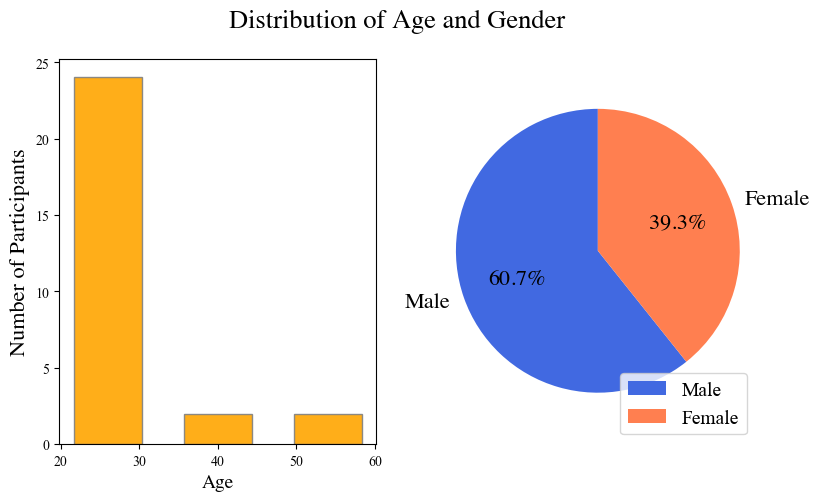

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter
plt.rcParams["font.family"] = "Times New Roman"


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))

# Custom bin settings
bin_gap = 14.1
bin_start = 19
bin_end = 61
#bins=np.arange(min(ages), max(ages) + bin_gap, bin_gap)
bins = [19, 32.99, 47, 61.01]


# Draw 1 histogram
ax[0].hist(ages, density=False, bins=bins, rwidth=0.62, color="orange", edgecolor='grey', alpha=0.9)  # density=False would make counts
ax[0].set_ylabel('Number of Participants', fontsize=16, fontname='Times')
ax[0].set_xlabel('Age', fontsize=14, fontname='Times');

# Sample data
labels = ['Male', 'Female']
sizes = [num_male, num_female]
colors = ['royalblue', 'coral']

# Create 2 pie chart
ax[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16, 'fontname': "Times"})

# Add a legend
ax[1].legend(labels, loc="lower right", prop={'size': 14})

# Set aspect ratio to be equal, so the pie is circular
ax[1].axis('equal')

# Add a title
fig.suptitle('Distribution of Age and Gender', fontsize=19, weight='bold', fontname='Times')

# SAVING
#plt.savefig('demographic.png', bbox_inches='tight')
plt.savefig("demographic.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

## Plot Composite Survey

<AxesSubplot:xlabel='Question'>

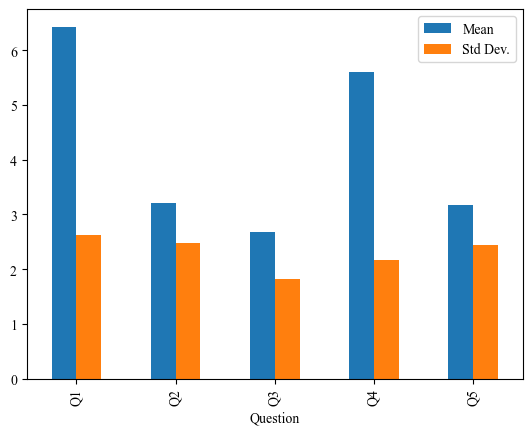

In [182]:
import numpy as np
import matplotlib.pyplot as plt


# creating Mean, Std, M/F dataframe
analytics = pd.DataFrame({
    'Question': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
    'Mean': [np.mean(df_valid[1].to_list()), np.mean(df_valid[2].to_list()), np.mean(df_valid[3].to_list()), np.mean(df_valid[4].to_list()), np.mean(df_valid[5].to_list())],
    'Std Dev.': [np.std(df_valid[1].to_list()), np.std(df_valid[2].to_list()), np.std(df_valid[3].to_list()), np.std(df_valid[4].to_list()), np.std(df_valid[5].to_list())]
})
  
# plotting graph
analytics.plot(x="Question", y=["Mean", "Std Dev."], kind="bar")

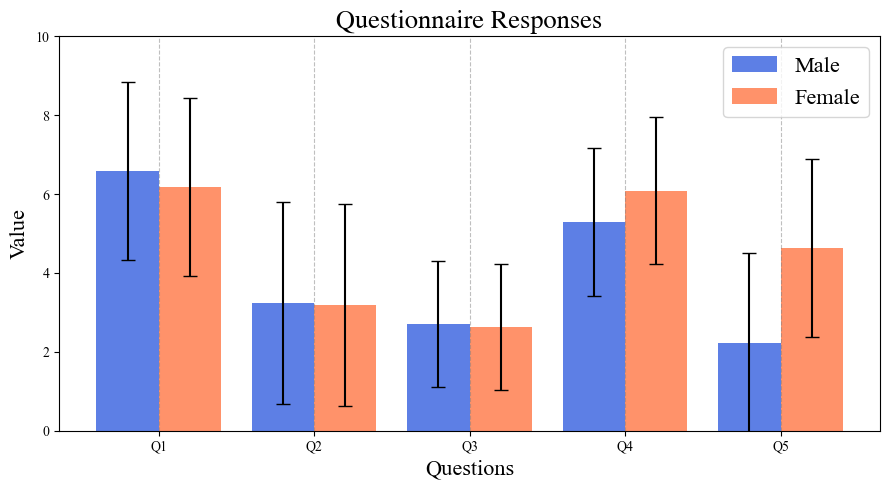

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"


# Sample data
labels = ["Male", "Female"]
questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
values1 = [float(np.mean(df_male[1].to_list())), float(np.mean(df_male[2].to_list())), float(np.mean(df_male[3].to_list())), float(np.mean(df_male[4].to_list())), float(np.mean(df_male[5].to_list()))]
values2 = [float(np.mean(df_female[1].to_list())), float(np.mean(df_female[2].to_list())), float(np.mean(df_female[3].to_list())), float(np.mean(df_female[4].to_list())), float(np.mean(df_female[5].to_list()))]
errors1 = [float(np.std(df_male[1].to_list())), float(np.std(df_male[2].to_list())), float(np.std(df_male[3].to_list())), float(np.std(df_male[4].to_list())), float(np.std(df_male[5].to_list()))]
errors2 = [float(np.std(df_female[1].to_list())), float(np.std(df_female[2].to_list())), float(np.std(df_female[3].to_list())), float(np.std(df_female[4].to_list())), float(np.std(df_female[5].to_list()))]
x = np.arange(5)
width = 0.4

# Create figure and axes
fig1, ax1 = plt.subplots(figsize=(9,5))

# Create the first bar chart with primary y-axis
bars1 = ax1.bar(x-0.2, values1, width, color='royalblue' , alpha=0.85, 
                yerr=errors1, capsize=5, label=labels[0])
ax1.set_xlabel('Questions', fontsize=16)
ax1.set_ylabel('Value', color='k', fontsize=16)
ax1.tick_params(axis='y', labelcolor='k')
ax1.set_title('Questionnaire Responses', fontsize=19, weight='bold', fontname='Times')

# Create a second y-axis
bars2 = ax1.bar(x+0.2, values2, width, color='coral', alpha=0.85, 
                yerr=errors1, capsize=5, label=labels[1])

ax1.set_ylim(0, 10)

plt.xticks(x, questions)

# Add vertical bars to each pillar
for i in range(len(questions)):
    ax1.axvline(i, color='gray', linestyle='dashed', linewidth=0.8, alpha=0.5)
    
ax1.legend(loc="upper right", prop={'size': 16})

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# SAVING
#plt.savefig('questionnaire_mcq.png', bbox_inches='tight')
plt.savefig("questionnaire_mcq.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()


In [24]:
df_valid.iloc[:,6].to_list()

['a,c,f',
 'g',
 'd,e,f',
 'g,h',
 'd,e,f,g',
 'd,e,f',
 'b,d,e,f,g',
 'a,g',
 'd,g',
 'c,d,f,g',
 'a,g',
 'a,d,e,f',
 'e,f',
 'c,d,e,f',
 'd',
 'a,d,e',
 'a,d,e,g',
 'a,d,g',
 'e,g',
 'a,g',
 'i',
 'b,g',
 'a,b,d,e,f,g',
 'd,f',
 'b,d,f',
 'd,f',
 'b,g',
 'a,b,d,g']

In [25]:
# Vote count
Q6 = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 0}
Q7 = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0}

In [26]:
for item in df_valid.iloc[:,6].to_list():
    ma_lst = item.split(',')
    for key in ma_lst:
        Q6[key] += 1
        
print(Q6)

{'a': 10, 'b': 6, 'c': 3, 'd': 17, 'e': 11, 'f': 13, 'g': 16, 'h': 1, 'i': 1}


In [27]:
for item in df_valid.iloc[:,7].to_list():
    ma_lst = item.split(',')
    for key in ma_lst:
        Q7[key] += 1
        
print(Q7)

{'a': 16, 'b': 13, 'c': 19, 'd': 8, 'e': 19, 'f': 1}


In [28]:
[QA6[i] for i in Q6.keys()]

NameError: name 'QA6' is not defined

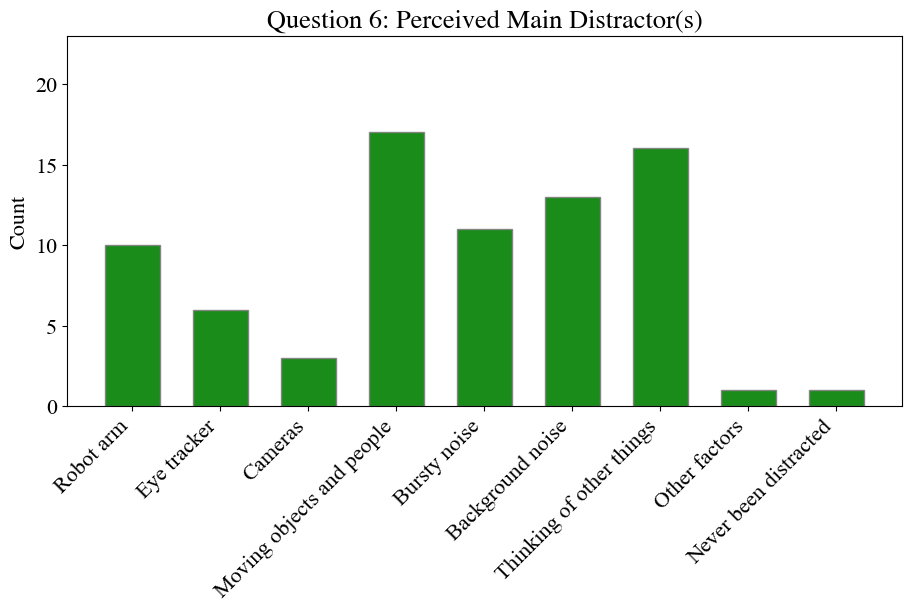

In [33]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 16

QA6 = {
    'a': "Robot arm",
    'b': "Eye tracker",
    'c': "Cameras",
    'd': "Moving objects and people",
    'e': "Bursty noise",
    'f': "Background noise",
    'g': "Thinking of other things",
    'h': "Other factors",
    'i': "Never been distracted"
}

width = 0.62

fig, ax = plt.subplots(figsize=(9,6), layout='constrained')

x = [QA6[i] for i in Q6.keys()]
bar_1 = ax.bar(x, Q6.values(), width, color='green', edgecolor='grey', alpha=0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count', fontsize=16, fontname='Times')
ax.set_title('Question 6: Perceived Main Distractor(s)', fontsize=19, weight='bold', fontname='Times')
#ax.legend(loc='upper right')
ax.set_ylim(0, 23)

plt.xticks(rotation=45, ha='right')


# SAVING
#plt.savefig('questionnaire_q6.png', bbox_inches='tight')
plt.savefig("questionnaire_q6.pdf", format="pdf", bbox_inches="tight")

plt.show()

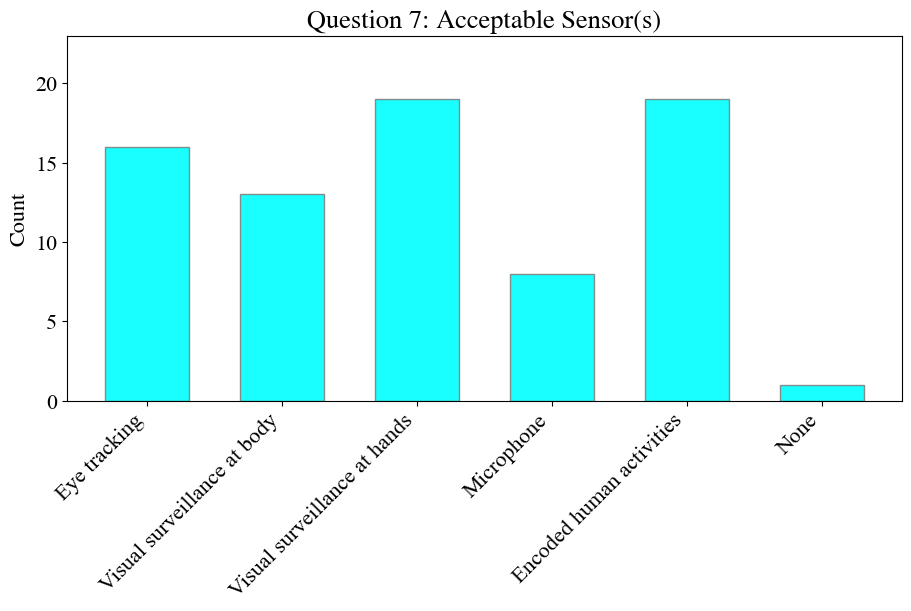

In [35]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 16

QA7 = {
    'a': "Eye tracking",
    'b': "Visual surveillance at body",
    'c': "Visual surveillance at hands",
    'd': "Microphone",
    'e': "Encoded human activities",
    'f': "None"
}

width = 0.62

fig, ax = plt.subplots(figsize=(9,6), layout='constrained')

xx = [QA7[i] for i in Q7.keys()]
bar_1 = ax.bar(xx, Q7.values(), width, color='cyan', edgecolor='grey', alpha=0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count', fontsize=16, fontname='Times')
ax.set_title('Question 7: Acceptable Sensor(s)', fontsize=19, weight='bold', fontname='Times')
#ax.legend(loc='upper right')
ax.set_ylim(0, 23)

plt.xticks(rotation=45, ha='right')

# SAVING
#plt.savefig('questionnaire_q7.png', bbox_inches='tight')
plt.savefig("questionnaire_q7.pdf", format="pdf", bbox_inches="tight")

plt.show()

## Annotations

In [78]:
from os.path import join

dataset_path = "/home/CAMPUS/daiz1/repo/WALI-HRI/dataset"

In [79]:
samples_lst = []  # a list of lists representing distract_length each

for item in os.listdir(dataset_path):
    if item.startswith('.'):
        continue
    anno_path = join(dataset_path, item, 'Pupil', 'annotations.csv')
    anno = pd.read_csv(anno_path)
    
    events_lst = [] 

    for row in range(int(len(anno)/2)):
        t = anno.loc[2*row+1, 'timestamp'] - anno.loc[2*row, 'timestamp']
        events_lst.append(t)
    samples_lst.append(events_lst)

In [80]:
anno

index   timestamp           label  duration  added_in_player
0   1032   96.837083  start_distract       0.0             True
1   1090  101.926899    end_distract       0.0             True
2   1424  133.867820  start_distract       0.0             True
3   1531  143.306337    end_distract       0.0             True
4   2183  208.415251  start_distract       0.0             True
5   2258  215.944850    end_distract       0.0             True
6   2694  258.529863  start_distract       0.0             True
7   2780  266.374996    end_distract       0.0             True
8   3045  291.193587  start_distract       0.0             True
9   3103  296.440910    end_distract       0.0             True

In [81]:
No_distract = 0
Total_duration = 0
Lst_of_distract, Lst_length_distract = [], []
Lst_all_distract = []


for lst in samples_lst:
    No_distract += len(lst)
    Total_duration += sum(lst)
    Lst_of_distract.append(len(lst))
    Lst_length_distract.append(sum(lst))
    Lst_all_distract.extend(lst)

    
Mean_duration = Total_duration / No_distract

In [82]:
print("Total_duration is ", sum(Lst_length_distract))

Total_duration is  2215.191669999427


In [83]:
print("Total No. of samples: ", len(Lst_of_distract))
print("Total No. of distractions: ", sum(Lst_of_distract))

Total No. of samples:  69
Total No. of distractions:  328


In [84]:
print("Percentage of Distraction over Total Recording Length: ", sum(Lst_length_distract)/(300 * len(Lst_of_distract)))

Percentage of Distraction over Total Recording Length:  0.10701409033813658


In [85]:
print("Mean No. of distraction per sample: ", sum(Lst_of_distract) / len(Lst_of_distract))

Mean No. of distraction per sample:  4.753623188405797


In [86]:
print("Mean_duration_per_distract ", sum(Lst_length_distract) / No_distract)

Mean_duration_per_distract  6.753633140242156


In [87]:
print("Std_dev_duration_per_sample ", np.std(Lst_length_distract))

Std_dev_duration_per_sample  38.81759689005403


In [88]:
print("Std_dev_duration_per_distract ", np.std(Lst_all_distract))

Std_dev_duration_per_distract  13.693464131464493
